Solving
Wave Equation


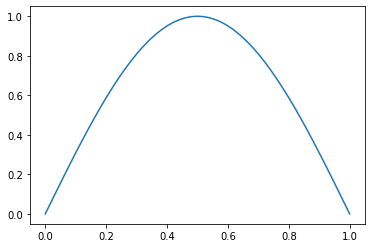

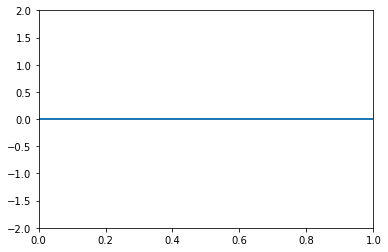

In [1]:
import numpy as np
































free_boundary =2
mode = 1
































def ic(x, mode):
     return np.sin(mode*np.pi*x)
    # return  np.exp(-(x-0.5)**2.0)













    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    





















import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


plt.rcParams['animation.ffmpeg_path'] = '/home/carlos/anaconda3/bin/ffmpeg'


if free_boundary == 0:
    free_end  = False
    free_ends = False
if free_boundary == 1:
    free_end  = True
    free_ends = False
if free_boundary == 2:
    free_end  = False
    free_ends = True
        
dx   = 0.02
x    = 1
xay  = np.arange(0, x+dx, dx)
N_x  = len(xay)

dt   = 0.01
t    = 1.0 #time in seconds
N_t  = int(t/dt)
tay  = np.arange(0, t+dt, dt)

y    = np.zeros( (3, N_x ) )
y[0] = ic(xay, mode) #initial conditions

plt.plot(xay, y[0])


y[0,N_x-1] = 0.0           #boundary conditions
y[0,0]     = 0.0           #boundary conditions
y[1]       = y[0]          #initial condition

d_snap   = 1  #Will store snpashots of y in steps of d_snap
n_all    = int(N_t/d_snap) + 1
yall     = np.zeros( (n_all, N_x) )
yall[0]  = y[0]
yall[1]  = y[1]

#k    = 0.5*dt*dt/(x[2]-x[1])**2.0

k  = 0.5

for i_t in range(1,N_t-2):
    for i_x in range(N_x):
        if i_x==0 or i_x==N_x-1:
            y[2, i_x] = 0.0
            if free_end:
                if i_x  == N_x-1: #To make one end free
                    y[2,i_x]  = 2.0*y[1,i_x]- y[0,i_x] + k * (  -1.0*y[1,i_x] + y[1,i_x-1]  )
            if free_ends:
                if i_x  == N_x-1: #To make one end free
                    y[2,i_x]  = 2.0*y[1,i_x]- y[0,i_x] + k * (  -1.0*y[1,i_x] + y[1,i_x-1]  )
                if i_x  == 0: #To make one end free
                    y[2,i_x]  = 2.0*y[1,i_x]- y[0,i_x] + k * (  -1.0*y[1,i_x] + y[1,i_x+1]  )
         
        else:
            y[2,i_x]  = 2.0*y[1,i_x]- y[0,i_x] + k * (  y[1,i_x+1] - 2.0*y[1,i_x] + y[1,i_x-1]  )
    y[0] = y[1]
    y[1] = y[2]
    
    if i_t%d_snap == 0:
        i_snap =  int(i_t/d_snap) 
        yall[i_snap] = y[2]
        #plt.plot(xay,yall[i_snap])
        

fig   = plt.figure()
ax    = plt.axes(xlim=(0, 1), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
  

def init():
    line.set_data(xay, np.sin(2*np.pi*x))
    return (line,)

def animate(i):
    
    #y = np.sin(mode*np.pi*xay)*np.cos(0.1*i)
    #line.set_data(xay, y)
    #return(line,)
    
    line.set_data(xay, yall[i])
    
    return (line,)

print('Solving')
print('Wave Equation')






































anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=n_all, interval=150, blit=False)
HTML(anim.to_html5_video())


